In [1]:
# install.packages("fcm") # Instalar via terminal

Installing package into ‘/home/user/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [2]:
library(fcm)

In [3]:
# Create the activation vector
act.vec <- data.frame(1, 1, 0, 0, 0, 0, 0, 0)
# Change the column names
colnames(act.vec) <- c("C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8")
C1 = c(0.0, 0.0, 0.6, 0.9, 0.0, 0.0, 0.0, 0.8)
C2 = c(0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.5)
C3 = c(0.0, 0.7, 0.0, 0.0, 0.9, 0.0, 0.4, 0.1)
C4 = c(0.4, 0.0, 0.0, 0.0, 0.0, 0.9, 0.0, 0.0)
C5 = c(0.0, 0.0, 0.0, 0.0, 0.0, -0.9, 0.0, 0.3)
C6 = c(-0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
C7 = c(0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.4, 0.9)
C8 = c(0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.6, 0.0)

In [6]:
# Create the weight matrix
w.mat <- matrix(c(C1, C2, C3, C4, C5, C6, C7, C8),
nrow = 8, ncol = 8, byrow = TRUE)
colnames(w.mat) <- c("C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8")
w.mat <- as.data.frame(w.mat)
w.mat

C1,C2,C3,C4,C5,C6,C7,C8
0.0,0.0,0.6,0.9,0.0,0.0,0.0,0.8
0.1,0.0,0.0,0.0,0.0,0.0,0.2,0.5
0.0,0.7,0.0,0.0,0.9,0.0,0.4,0.1
0.4,0.0,0.0,0.0,0.0,0.9,0.0,0.0
0.0,0.0,0.0,0.0,0.0,-0.9,0.0,0.3
-0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.8,0.4,0.9
0.1,0.0,0.0,0.0,0.0,0.1,0.6,0.0


In [12]:
### Select the arguments for the fcm.infer function
output <- fcm.infer(act.vec, w.mat, 50, "r", "s")


 The concepts' values are converged in the 49th state (e <= 0.001000) 

        C1        C2        C3        C4        C5        C6        C7
 0.4998427 0.4985174 0.4989474 0.4984212 0.4980938 0.4885541 0.4855651
        C8
 0.4853266



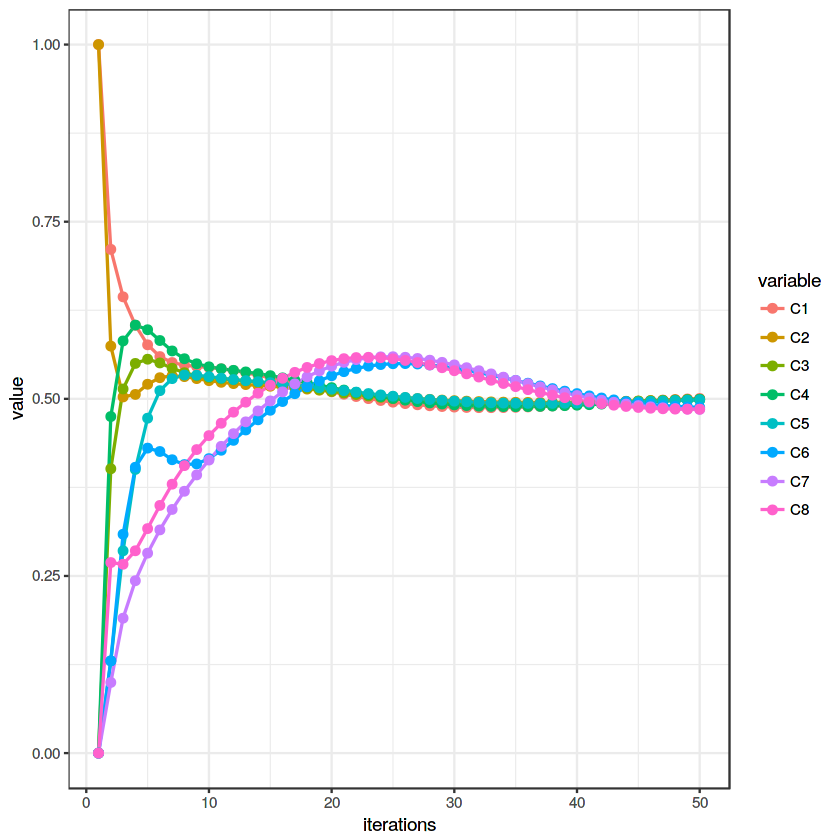

In [9]:
library (reshape2)
library (ggplot2)

# create a numeric vector named "iterations"
iterations <- as.numeric(rownames(output$values))

# add "iterations" in the "output$values" dataframe
df <- data.frame(iterations, output$values)

#transform df into long formats
df2 <- melt(df, id="iterations")
ggplot(data=df2,
       aes(x=iterations, y=value, group=variable, colour=variable)) +
       theme_bw() + geom_line(size=0.7) + geom_point(size = 2)